In [2]:
import pandas as pd
import os
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import random


In [3]:
# Ignore this - used so that matplotlib works.
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [4]:
column_names = ["MR", "eye_closed", "freq", "perclo", "eye_circ", "pupil", "eyebrow", "moer", "EYES.ear"]


In [5]:
# Initialize lists to store data
X = []
Y = []
X_test = []
y_test = []

def train(folder):
    """Get X and Y features from csv files."""
    global X, Y
    for filename in os.listdir(folder):
        if filename.startswith('drowsy'):
            ylabel = 1
        else:
            ylabel = 0
        with open(os.path.join(folder,filename),'r') as f:
            re = csv.reader(f,delimiter=',')
            for row in re:
                a = []
                for x in row:
                    a.append(float(x))
                X.append(a)
                Y.append(ylabel)


In [6]:
for i in [1,2,3,4]:
    train(f'Data2\\Fold{i}')

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets while maintaining the class distribution
_, X_test, _, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=42)


In [8]:
# Combine the testing data back into a DataFrame
df = pd.DataFrame(X_test, columns=column_names)
df['label'] = Y_test
df = df.apply(pd.to_numeric)

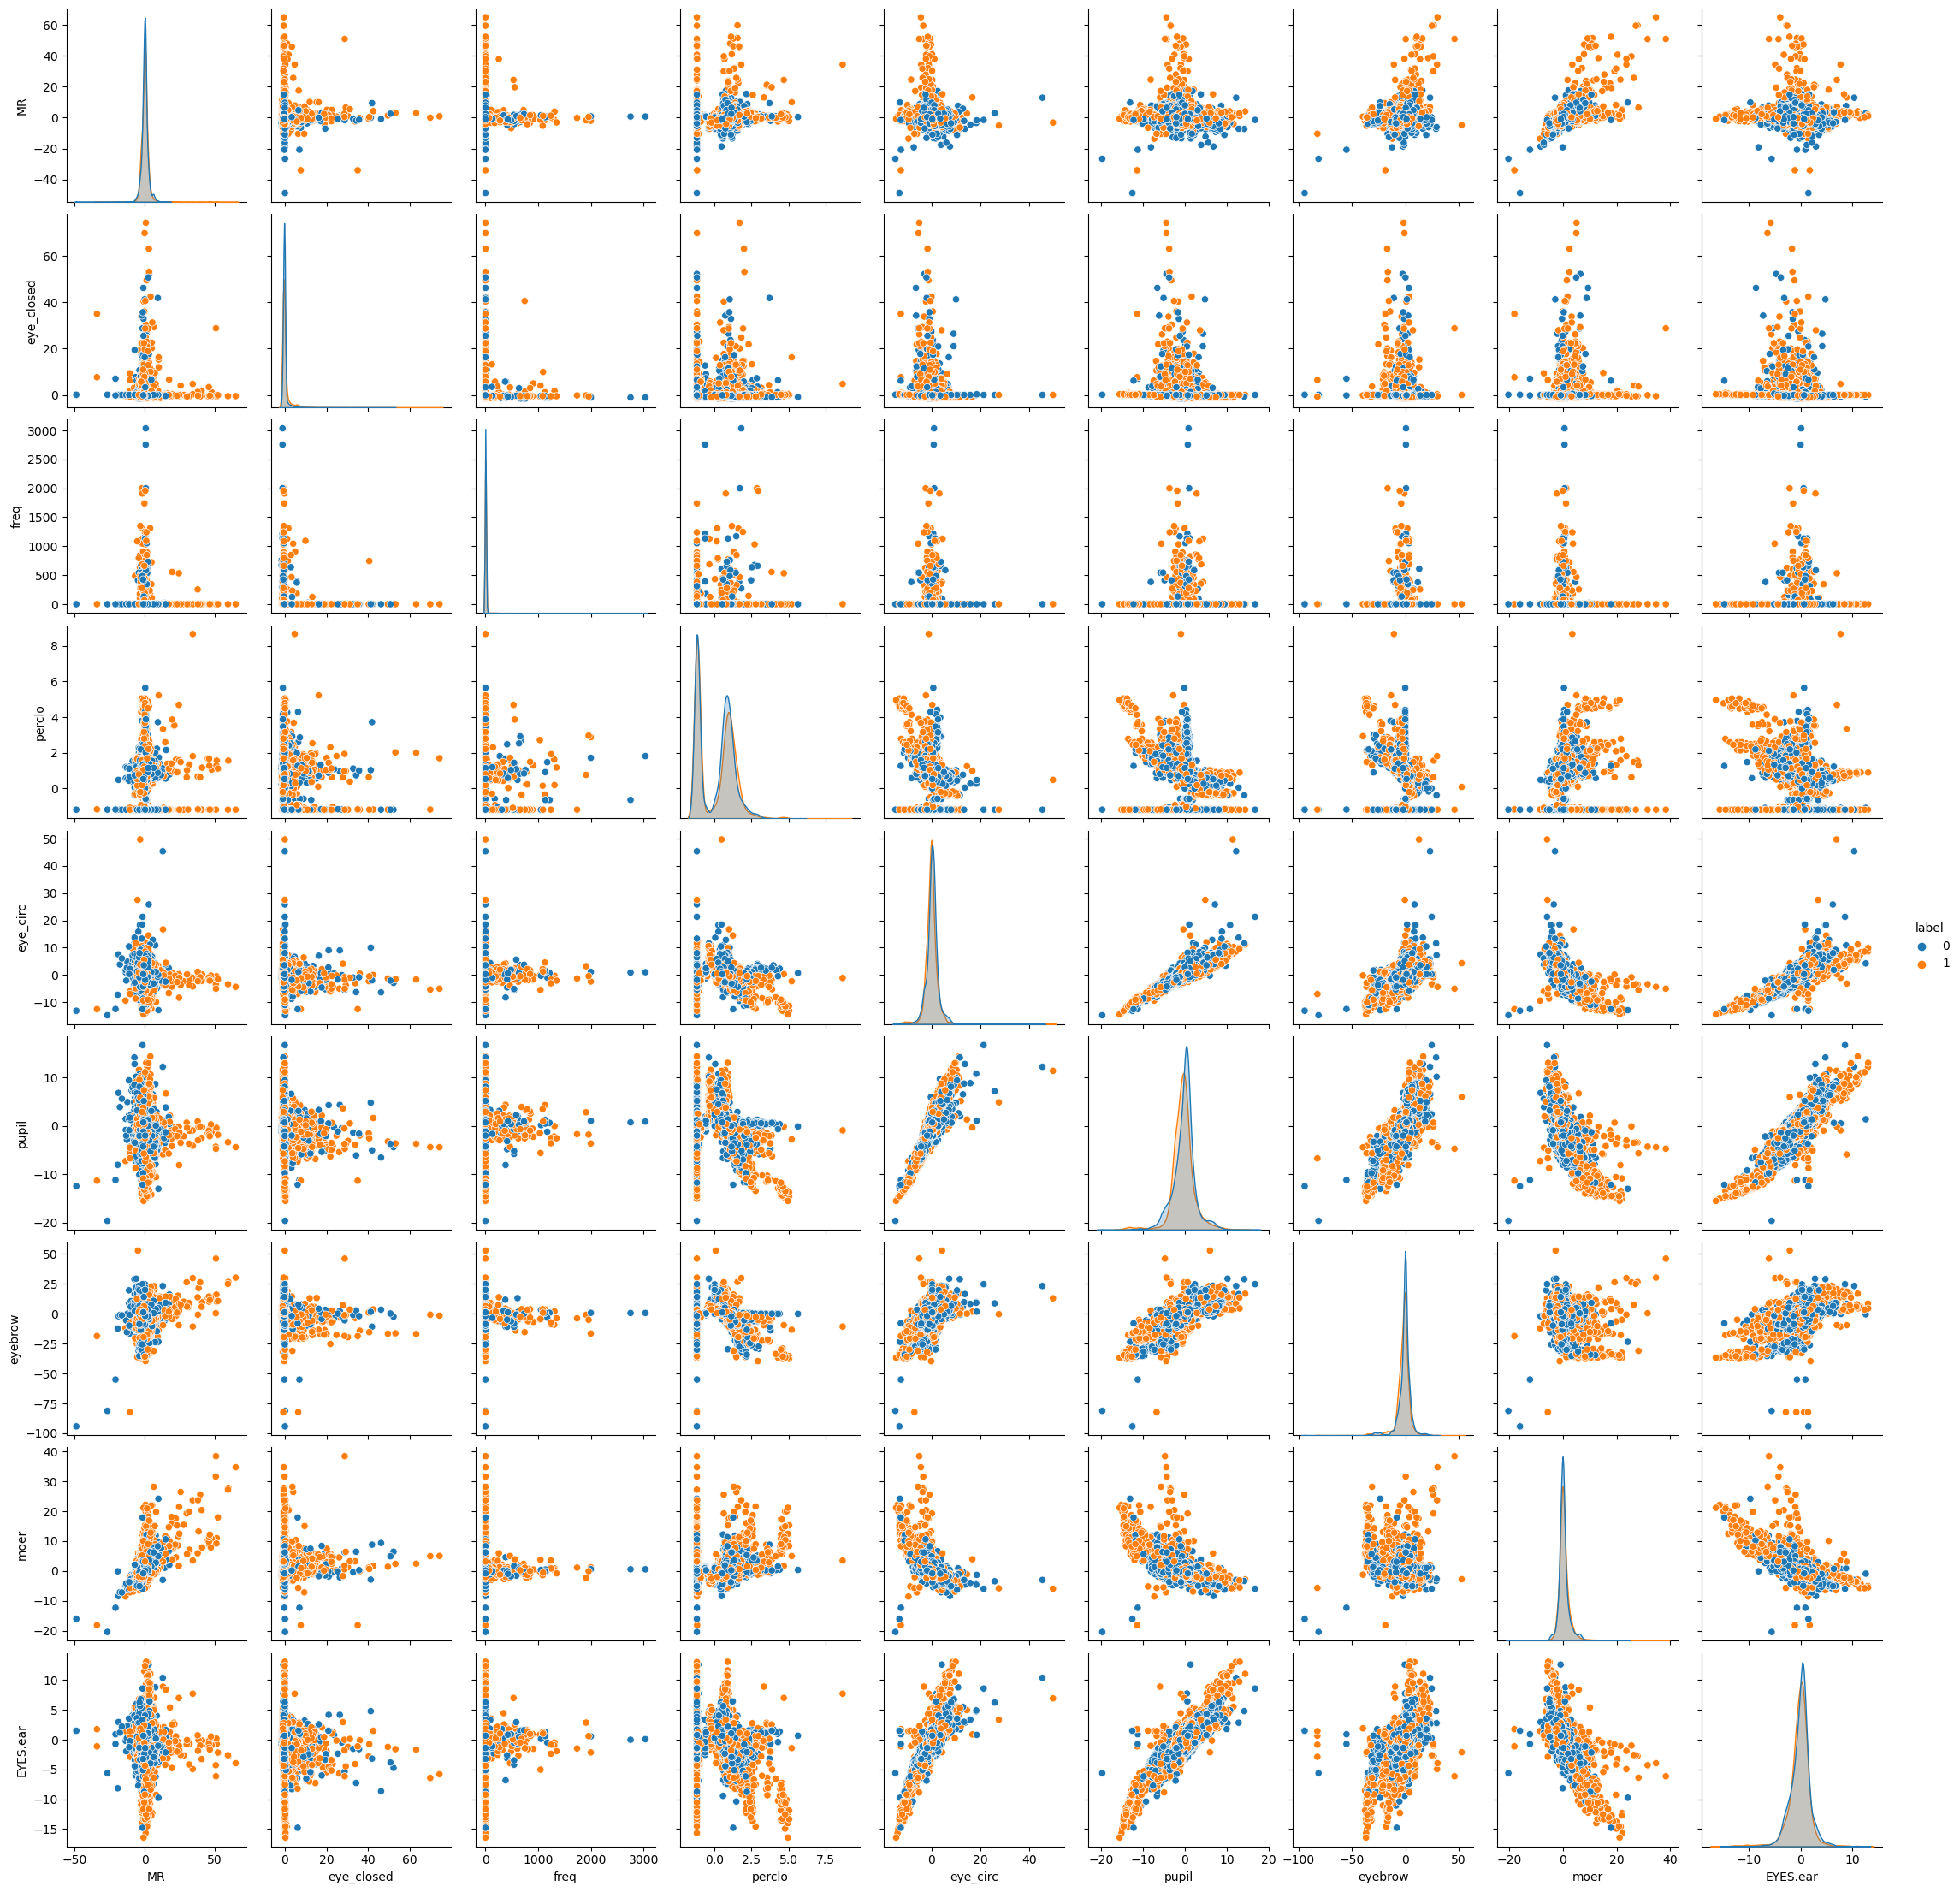

In [24]:
pairplot = sns.pairplot(df, hue='label', diag_kind='kde')
plt.show()


In [25]:
pairplot.savefig('../pairplot2.png', dpi=300)

C:\Users\Ali Syed\AppData\Local\Temp\ipykernel_2256\732804940.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[df['label'] == label], x=feature, kde=False, bins=30, ax=axes[i], label=label, alpha=0.7, palette='muted')
C:\Users\Ali Syed\AppData\Local\Temp\ipykernel_2256\732804940.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[df['label'] == label], x=feature, kde=False, bins=30, ax=axes[i], label=label, alpha=0.7, palette='muted')
C:\Users\Ali Syed\AppData\Local\Temp\ipykernel_2256\732804940.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[df['label'] == label], x=feature, kde=False, bins=30, ax=axes[i], label=label, alpha=0.7, palette='muted')
C:\Users\Ali Syed\AppData\Local\Temp\ipykernel_2256\732804940.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[df[

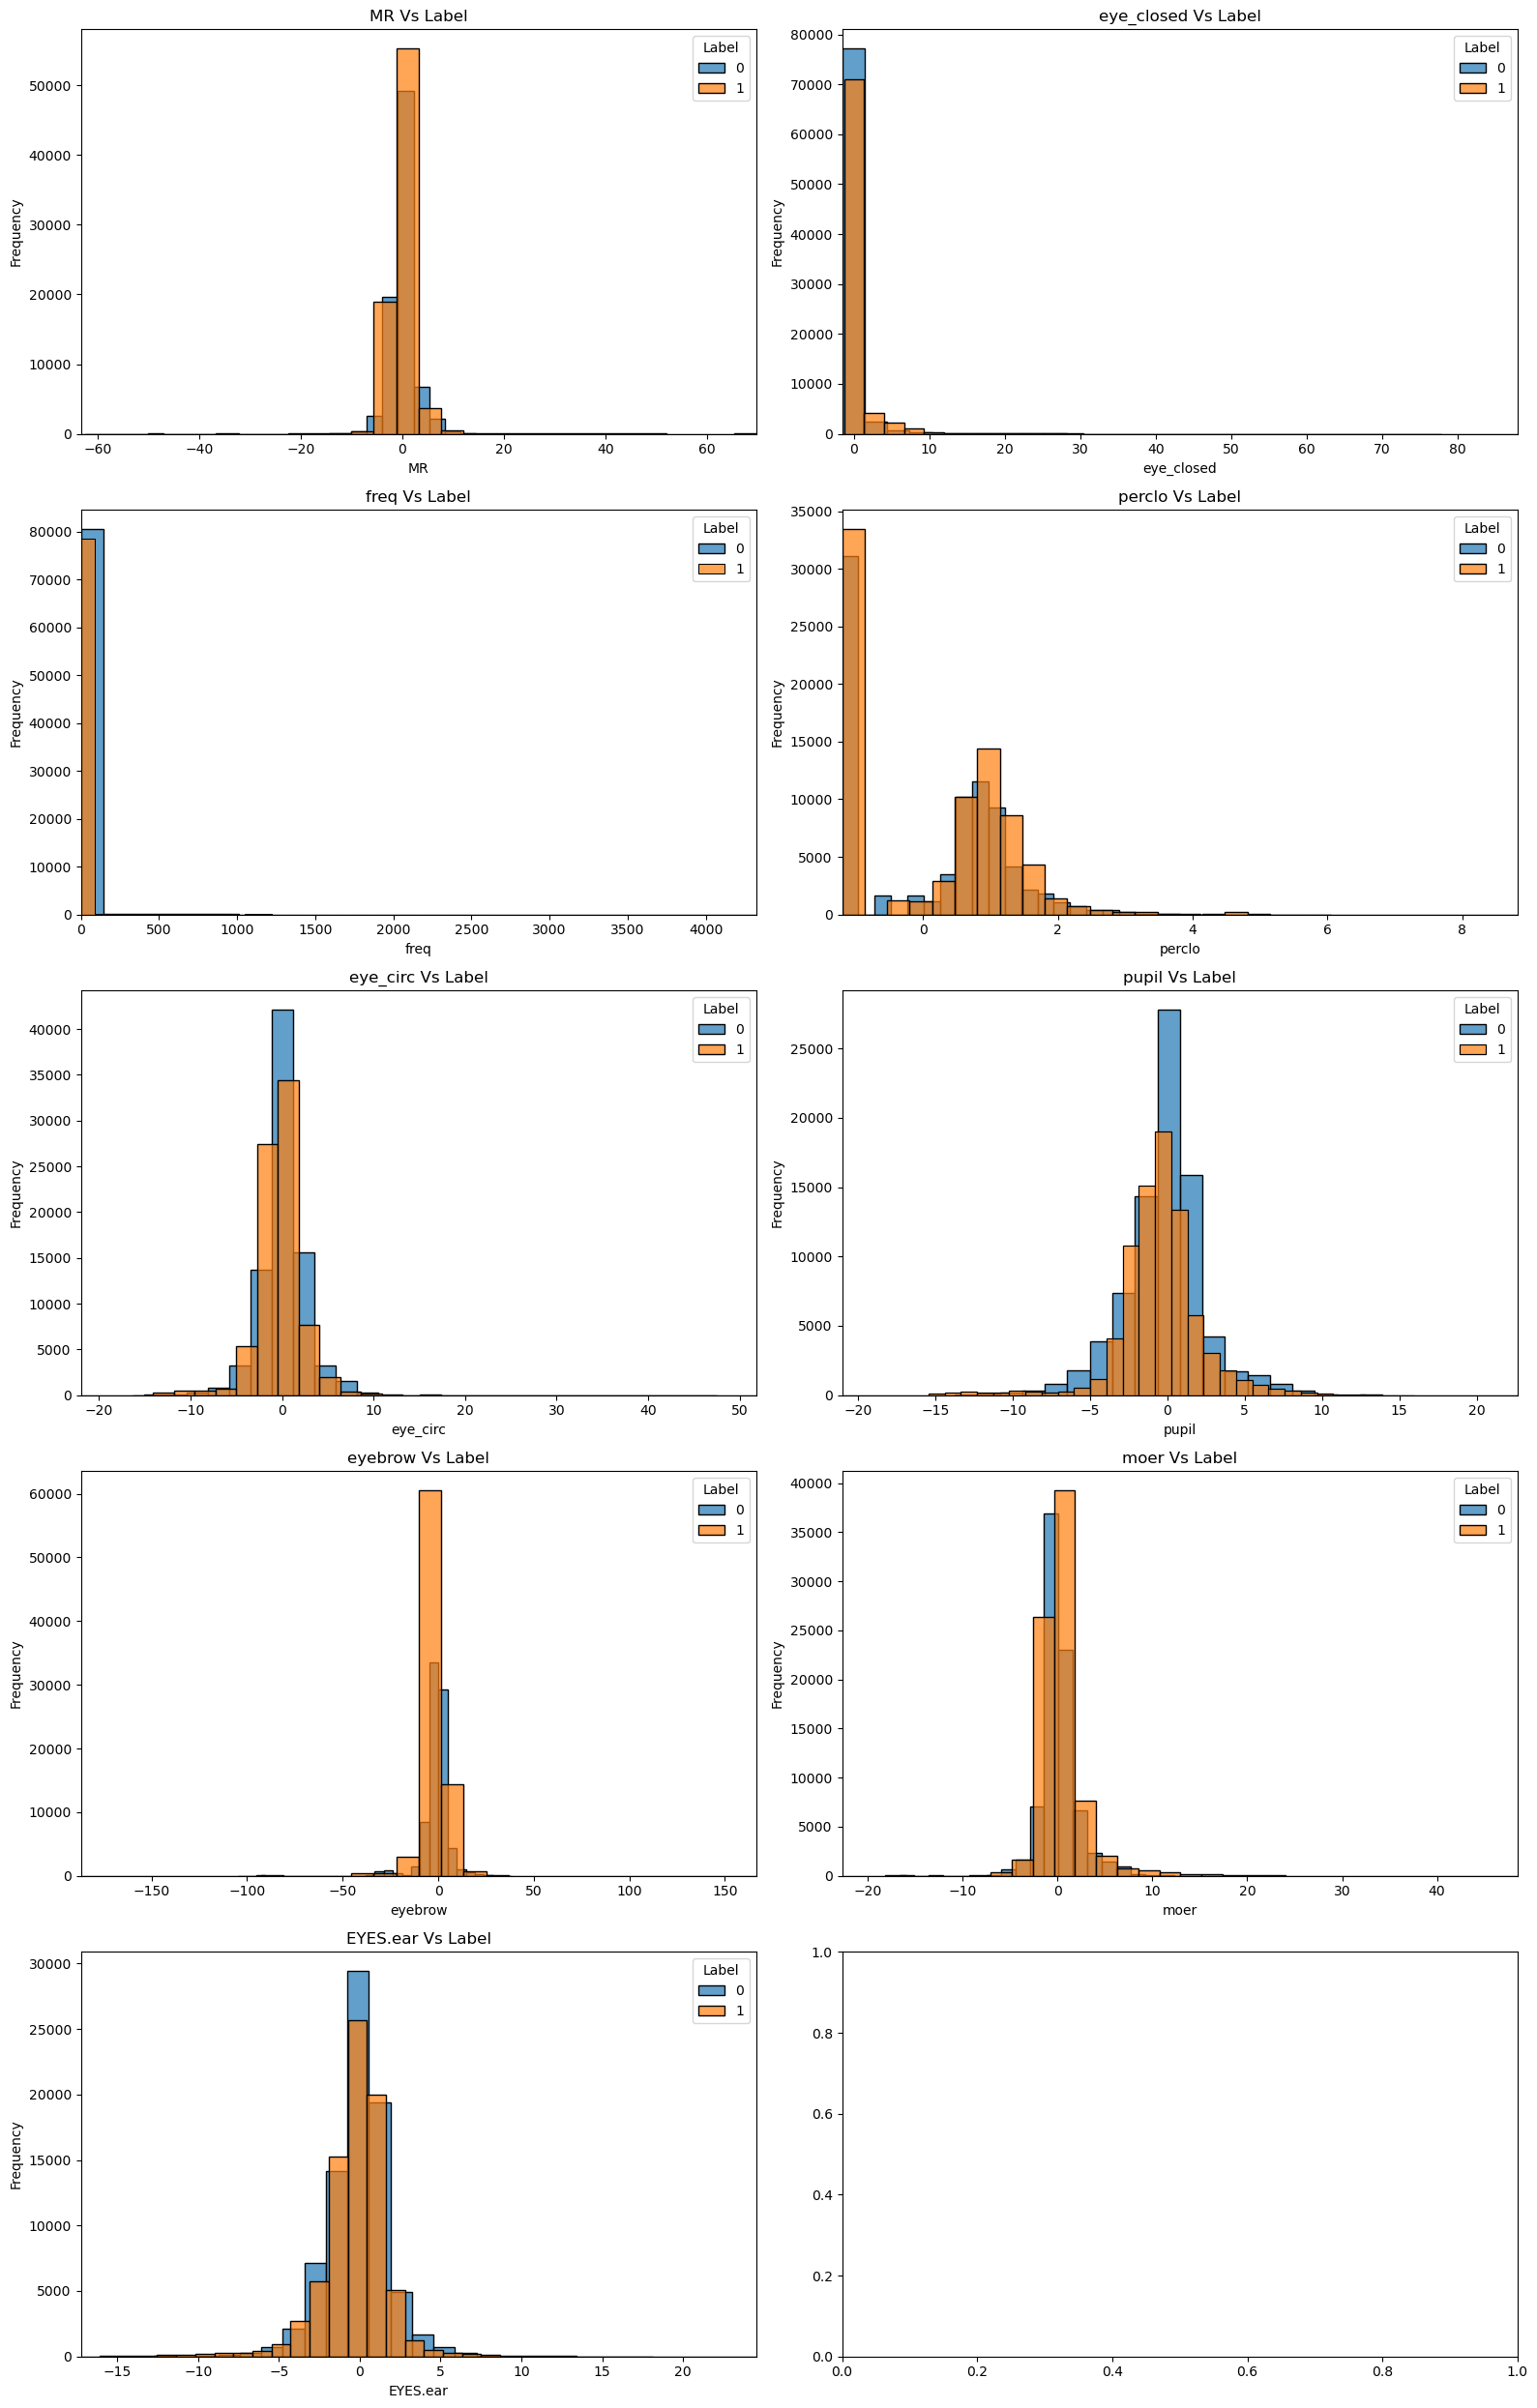

In [9]:
# Define the number of rows and columns for subplots
n_features = len(column_names)
n_cols = 2  # Adjust as needed
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))

# Flatten the axes array if it's more than one dimension
if n_rows > 1:
    axes = axes.flatten()


# Plot histograms for each feature with respect to the label
for i, feature in enumerate(column_names):
    for label in df['label'].unique():
        # Calculate bin width dynamically based on the range of values in the feature
        bin_width = (df[feature].max() - df[feature].min()) / 30  # Adjust the number of bins as needed
        sns.histplot(data=df[df['label'] == label], x=feature, kde=False, bins=int((df[feature].max() - df[feature].min()) / bin_width), ax=axes[i], label=label, alpha=0.7, palette='muted')
    axes[i].set_title(f'{feature} Vs Label')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend(title='Label')



# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('../histograms2.png')
plt.show()


<Figure size 640x480 with 0 Axes>